# Python pour DATA

Python est un langage puissant et polyvalent et l'un des domaines dans lesquels il est le plus utilisé est le domaine DATA.

Le domaine DATA est le domaine dans lequel nous travaillons avec des informations de toutes sortes, en grand nombre et même très volumineuses et que nous appelons données.

Les données collectées se présentent sous différentes formes, dont certaines peuvent être incomplètes ou erronées.

Par conséquent, afin de pouvoir travailler avec eux, nous devrons traiter les données au début de chaque projet. Python est un outil très utile en traitement de données.


Ce document vous montrera ce que vous pouvez faire avec un ensemble de données, avant qu'il ne soit utilisé pour une application, ou un algorithme d'apprentissage automatique (par exemple, une prédiction).

### Cas d'étude

Pour la pratique, nous considérons l'étude de cas suivante :

Demandez à un acheteur de maison de décrire la maison de ses rêves, et il ne commencera probablement pas par la hauteur du plafond du sous-sol ou la proximité d'une voie ferrée est-ouest. Mais l'ensemble de données prouve qu'il y beaucoup plus des éléments qui 
influence les négociations de prix que le nombre de chambres ou une clôture blanche.

Avec 79 variables explicatives décrivant (presque) tous les aspects des maisons résidentielles à Ames, Iowa, le défi est de prédire le prix final de chaque maison.

In [140]:
# Avant de commencer, assurez-vous que les packages sont installés : pandas, matplotlib, seaborn, scikit-learn avec 
# Pour ça, utilisez pip install in IDE terminal 
# Par example, pip install -U scikit-learn 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_rows',None)


Chaque fois que nous allons démarrer un projet basé sur l'apprentissage automatique, nous devons d'abord collecter les données ou les importer à partir d'une source secondaire. Ci-dessous la liste des étapes que nous allons suivre:

1. Collecter les données / Importer les données depuis la source.

2. Décrire les données/l'ensemble de données

3. Effectuer le prétraitement des données (les 4 "C")

 - Corrigez les données

 - Créez les données

 - Compléter les données

 - Convertir les données

4. Analyse exploratoire des données

5. Ingénierie des fonctionnalités

6. Sélection des fonctionnalités

7. Créer les modèles

8. Tester/Valider les Modèles

9. Évaluer le modèle

## 1. Import les Data/Dataset

À la source, trois ensembles de données sont disponibles.

- entraînement train.csv

- test test.csv

- soumettre des exemples de données sample_submission.csv

Tous ces ensembles de données seront utilisés pour la prédiction requise

In [141]:
# Importer les données depuis la source
train_data = pd.read_csv(r"C:\Users\claud\Desktop\DEV IA\JOUR 10\house-prices-advanced-regression-techniques\train.csv")
test_data = pd.read_csv(r"C:\Users\claud\Desktop\DEV IA\JOUR 10\house-prices-advanced-regression-techniques\test.csv")
sample_sub = pd.read_csv(r"C:\Users\claud\Desktop\DEV IA\JOUR 10\house-prices-advanced-regression-techniques\sample_submission.csv")

Dans un but purement pédagogique nous nous référerons uniquement aux deux ensembles test et train.

Afin de voir nos données, nous sélectionnerons l'échantillon de 5 des données pour examiner les données de train / test.

In [142]:
# imprimer l'échantillon des données
train_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1268,1269,50,RL,NaN,14100,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,8,9,1935,1997,Gable,CompShg,Stucco,Stucco,BrkFace,632.0,TA,Gd,CBlock,TA,TA,Mn,Rec,192,Unf,0,536,728,GasA,Ex,Y,SBrkr,1968,1479,0,3447,0,0,3,1,4,1,Gd,11,Typ,2,Gd,BuiltIn,1982.0,Unf,3,1014,TA,TA,Y,314,12,0,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,381000
656,657,20,RL,72.0,10007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1959,2006,Gable,CompShg,HdBoard,HdBoard,BrkFace,54.0,Gd,TA,CBlock,TA,TA,No,ALQ,806,Unf,0,247,1053,GasA,Ex,Y,SBrkr,1053,0,0,1053,1,0,1,1,3,1,Gd,5,Typ,0,NaN,Attchd,1959.0,RFn,1,312,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD,Normal,145500
804,805,20,RL,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,812,Unf,0,124,936,GasA,TA,Y,SBrkr,1128,0,0,1128,0,0,1,0,2,1,TA,5,Min1,0,NaN,Attchd,1954.0,Unf,1,286,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,6,2006,WD,Family,118000
842,843,80,RL,82.0,9020,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,6,7,1966,1966,Gable,CompShg,HdBoard,HdBoard,BrkFace,183.0,TA,TA,CBlock,TA,TA,Gd,Rec,312,ALQ,539,276,1127,GasA,TA,Y,SBrkr,1165,0,0,1165,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1966.0,RFn,2,490,Gd,Gd,Y,0,129,0,0,0,0,NaN,GdPrv,NaN,0,5,2008,WD,Normal,174900
1224,1225,60,RL,60.0,15384,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,724,Unf,0,64,788,GasA,Ex,Y,SBrkr,788,702,0,1490,1,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2004.0,Fin,2,388,TA,TA,Y,100,75,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,184000


In [143]:
test_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
953,2414,20,RL,60.0,11556,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,9,1953,2006,Gable,CompShg,VinylSd,MetalSd,None,0.0,TA,Ex,CBlock,TA,TA,No,BLQ,408.0,Unf,0.0,456.0,864.0,GasA,Gd,Y,SBrkr,1154,0,0,1154,0.0,0.0,1,1,3,1,Ex,6,Typ,0,NaN,Detchd,1962.0,Unf,1.0,336.0,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
574,2035,60,FV,79.0,10646,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,513.0,TA,TA,PConc,TA,TA,No,GLQ,681.0,Unf,0.0,177.0,858.0,GasA,Ex,Y,SBrkr,872,917,0,1789,1.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2001.0,Fin,2.0,546.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
266,1727,120,RL,50.0,7175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,TwnhsE,1Story,6,5,1990,1991,Gable,CompShg,Plywood,ImStucc,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1332.0,1332.0,GasA,Gd,Y,SBrkr,1332,0,0,1332,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1990.0,RFn,2.0,542.0,TA,TA,Y,0,60,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
714,2175,60,RL,NaN,9720,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,9,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,134.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,1194.0,Unf,0.0,163.0,1357.0,GasA,Ex,Y,SBrkr,1366,581,0,1947,1.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,BuiltIn,2001.0,Fin,3.0,725.0,TA,TA,Y,168,116,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
275,1736,20,RL,65.0,7150,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1962,1962,Gable,CompShg,VinylSd,VinylSd,BrkFace,60.0,TA,TA,CBlock,TA,TA,No,LwQ,140.0,BLQ,590.0,182.0,912.0,GasA,Gd,Y,SBrkr,912,0,0,912,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1962.0,Unf,1.0,252.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal


## 2. Décrire l'ensemble de données
Cela signifie la forme des ensembles de données train et test.

In [144]:
# la forme des ensembles de données
print("train ont lignes et colonnes:",train_data.shape)
print("test ont lignes et colonnes:", test_data.shape)

train ont lignes et colonnes: (1460, 81)
test ont lignes et colonnes: (1459, 80)


#### Comme nous le voyons, les données de training sont supérieures aux données de test.

In [145]:
# informations sur les data
# Cela signifie : les nomes, le type de données, leur nombre, si elles sont complètes ou non, la mémoire allouée, etc.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [146]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Décrire les statistiques descriptives des données

In [147]:
#décrire les statistiques dans les données, la colonne count
train_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [148]:
test_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459,1459,1458,1458,1443,1444.000000,1459,1459,1459,1415,1414,1415,1417,1458.000000,1417,1458.000000,1458.000000,1458.000000,1459,1459,1459,1459,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458,1459.000000,1457,1459.00000,729,1383,1381.000000,1381,1458.000000,1458.000000,1381,1381,1459,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,5,3,25,9,5,5,7,NaN,NaN,NaN,NaN,6,4,13,15,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,4,5,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,4,5,3,NaN,NaN,NaN,NaN,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1114,NaN,NaN,1453,70,934,1311,1457,1081,1396,218,1251,1444,1205,745,NaN,NaN,NaN,NaN,1169,1442,510,510,878,NaN,892,1256,661,634,1295,951,431,NaN,1237,NaN,NaN,NaN,1446,752,1358,1337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,757,NaN,1357,NaN,364,853,NaN,625,NaN,NaN,1293,1328,1301,NaN,NaN,NaN,NaN,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.078821,5.553804,1971.357779,1983.662783,NaN,NaN,NaN,NaN,NaN,100.709141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.203704,NaN,52.619342,554.294925,1046.117970,NaN,NaN,NaN,NaN,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,NaN,6.385195,NaN,0.58122,NaN,NaN,1977.721217,NaN,1.766118,472.768861,NaN,NaN,NaN,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436812,1.113740,30.390071,21.130467,NaN,NaN,NaN,NaN,NaN,177.625900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.268042,NaN,176.753926,437.260486,442.898624,NaN,NaN,NaN,NaN,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,NaN,1.508895,NaN,0.64742,NaN,NaN,26.431175,NaN,0.775945,217.048611,NaN,NaN,NaN,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1879.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,3.000000,NaN,0.00000,NaN,NaN,1895.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0

### Vérifiez les valeurs nulles pour chaque colonne

In [149]:
# vérifier le nettoyage des données, les 4c : corriger, compléter, créer, convertir
# vérifier les valeurs nulles pour chaque colonne
# targets = train_data['SalePrice']
# train_data.drop(['SalePrice'], axis=1, inplace=True)
def check_null_status(train_data, test_data):
    null_data = pd.DataFrame({'train_null_data %':[None],'test_null_data %':[None]}, index=test_data.columns)
    for col in test_data.columns:
        null_data.loc[col] = (round(sum(train_data[col].isna())/train_data.shape[0],2)*100,round(sum(test_data[col].isna())/test_data.shape[0],2)*100)
    return null_data
check_null_status(train_data, test_data)

,train_null_data %,test_null_data %
Id,0.0,0.0
MSSubClass,0.0,0.0
MSZoning,0.0,0.0
LotFrontage,18.0,16.0
LotArea,0.0,0.0
Street,0.0,0.0
Alley,94.0,93.0
LotShape,0.0,0.0
LandContour,0.0,0.0
Utilities,0.0,0.0


## 3. Data Pre-processing

In [150]:
# supprimez les colonnes qui ont plus de 80 % de valeurs nulles, parceque elles ne sont pas utiles pour la prediction

train_data.drop(['Id','PoolQC','Fence','MiscFeature','Alley'], axis=1, inplace=True)
test_data.drop(['Id','PoolQC','Fence','MiscFeature','Alley'], axis=1, inplace=True)

In [151]:
train_data.select_dtypes(include='O').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [152]:
test_data.select_dtypes(include='O').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [153]:
# Le résultat après avoir corrigé les problèmes de valeurs nulles

check_null_status(train_data, test_data)

,train_null_data %,test_null_data %
MSSubClass,0.0,0.0
MSZoning,0.0,0.0
LotFrontage,18.0,16.0
LotArea,0.0,0.0
Street,0.0,0.0
LotShape,0.0,0.0
LandContour,0.0,0.0
Utilities,0.0,0.0
LotConfig,0.0,0.0
LandSlope,0.0,0.0


In [154]:

train_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [155]:
train_data.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1104,160,RM,24.0,2016,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,5,1970,1970,Gable,CompShg,HdBoard,HdBoard,BrkFace,304.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,630,630,GasA,TA,Y,SBrkr,630,672,0,1302,0,0,2,1,3,1,TA,6,Typ,0,NaN,Detchd,1970.0,Unf,2,440,TA,TA,Y,0,0,0,0,0,0,0,4,2007,WD,Normal,106000
1130,50,RL,65.0,7804,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,TA,Y,SBrkr,1328,653,0,1981,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,0,12,2009,WD,Normal,135000
1049,20,RL,60.0,11100,Pave,Reg,Low,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1946,2006,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,930,0,0,930,0,0,1,0,2,1,Gd,6,Typ,0,NaN,Detchd,1946.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Abnorml,84900
549,60,FV,75.0,9375,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,912,912,GasA,Ex,Y,SBrkr,912,1182,0,2094,0,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2003.0,Fin,2,615,TA,TA,Y,182,182,0,0,0,0,0,11,2009,WD,Normal,263000
1298,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000
836,30,RM,90.0,8100,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1948,1973,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,338,Unf,0,1221,1559,GasA,Gd,Y,SBrkr,1559,0,0,1559,1,0,1,0,2,1,TA,5,Min2,0,NaN,Detchd,1948.0,Unf,2,812,TA,TA,Y,0,116,230,0,0,0,0,6,2007,COD,Normal,153500
1228,120,RL,65.0,8769,Pave,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2008,2008,Hip,CompShg,MetalSd,MetalSd,BrkFace,766.0,Ex,TA,PConc,Ex,TA,No,GLQ,1540,Unf,0,162,1702,GasA,Ex,Y,SBrkr,1702,0,0,1702,1,0,1,1,1,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3,1052,TA,TA,Y,0,72,0,0,224,0,0,10,2008,New,Partial,367294
1121,20,RL,84.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,Av,GLQ,24,Unf,0,1528,1552,GasA,Ex,Y,SBrkr,1552,0,0,1552,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2005.0,RFn,3,782,TA,TA,Y,144,20,0,0,0,0,0,7,2006,New,Partial,212900
1034,30,RL,50.0,6305,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,5,7,1938,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,PConc,Fa,Fa,No,Unf,0,Unf,0,920,920,GasA,Ex,Y,SBrkr,954,0,0,954,0,0,1,0,2,1,Fa,5,Typ,1,Gd,Basment,1938.0,Unf,1,240,Fa,TA,Y,0,0,0,0,0,0,0,6,2007,WD,Normal,119750
205,20,RL,99.0,11851,Pave,Reg,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1424,1424,GasA,Ex,Y,SBrkr,1442,0,0,1442,0,0,2,0,3,1,TA,5,Typ,0,NaN,Attchd,1990.0,RFn,2,500,TA,TA,Y,0,34,0,508,0,0,0,5,2009,WD,Normal,180500


In [156]:

import re
def create_new_feature(data):
    dt = re.findall(r'\d+\.*\d*', str(data))
    if dt:
        return float(dt[0])
    else:
        return 1
    
def create_new_cat_feature(data):
    dt = re.findall(r'[a-zA-Z]+', str(data))
    if dt:
        return str(dt[0])
    else:
        None
        
for col in ['LotShape','BldgType','HouseStyle']:
    train_data[str(col)+'_n'] = train_data[col].apply(create_new_feature)
    train_data[col] = train_data[col].apply(create_new_cat_feature)

    test_data[str(col)+'_n'] = test_data[col].apply(create_new_feature)
    test_data[col] = test_data[col].apply(create_new_cat_feature)

    

In [157]:
train_data.sample(10)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotShape_n,BldgType_n,HouseStyle_n
42,85,RL,NaN,9180,Pave,IR,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,Fam,SFoyer,5,7,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,747,LwQ,93,0,840,GasA,Gd,Y,SBrkr,884,0,0,884,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1983.0,RFn,2,504,TA,Gd,Y,240,0,0,0,0,0,0,12,2007,WD,Normal,144000,1.0,1.0,1.0
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,Fam,Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000,1.0,1.0,2.0
589,40,RM,50.0,9100,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,RRAn,Feedr,Fam,Story,5,6,1930,1960,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,742,742,GasA,TA,Y,FuseA,779,0,156,935,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1988.0,Unf,1,308,TA,TA,P,0,0,0,0,0,0,600,8,2008,WD,Normal,79500,1.0,1.0,1.0
299,20,RL,80.0,14000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Fam,Story,6,8,1950,2004,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,1092,1092,GasA,Ex,Y,SBrkr,1152,0,0,1152,0,1,1,0,3,1,Gd,6,Typ,1,Gd,Attchd,1950.0,Unf,1,300,TA,TA,Y,0,36,0,0,0,0,0,8,2009,WD,Family,158500,1.0,1.0,1.0
89,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,Fam,Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600,1.0,1.0,1.0
458,70,RM,NaN,5100,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Fam,Story,8,7,1925,1996,Hip,CompShg,Stucco,Wd Shng,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0,Unf,0,588,588,GasA,Fa,Y,SBrkr,833,833,0,1666,0,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1925.0,Unf,1,228,TA,TA,Y,192,63,0,0,0,0,0,6,2008,WD,Normal,161000,1.0,1.0,2.0
826,45,RM,50.0,6130,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,Fam,Unf,5,6,1924,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,ALQ,784,Unf,0,0,784,GasA,Gd,Y,SBrkr,784,0,0,784,1,0,1,0,2,1,Gd,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,116,0,0,0,0,5,2008,WD,Normal,109500,1.0,1.0,1.5
597,120,RL,53.0,3922,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,72.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1258,1258,GasA,Ex,Y,SBrkr,1402,0,0,1402,0,2,0,2,2,1,Gd,7,Typ,1,Gd,Attchd,2006.0,Fin,3,648,TA,TA,Y,120,16,0,0,0,0,0,2,2007,New,Partial,194201,1.0,1.0,1.0
864,20,FV,72.0,8640,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Fam,Story,7,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1372,1372,GasA,Ex,Y,SBrkr,1372,0,0,1372,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2,529,TA,TA,Y,0,140,0,0,0,0,0,5,2008,New,Partial,250580,1.0,1.0,1.0
138,60,RL,73.0,9066,Pave,IR,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,Fam,Story,8,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,320.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,668,Unf,0,336,1004,GasA,Ex,Y,SBrkr,1004,848,0,1852,0,0,2,1,3,1,Gd,7,Typ,2,TA,Attchd,1999.0,Fin,3,660,TA,TA,Y,224,106,0,0,0,0,0,12,2008,WD,Normal,230000,1.0,1.

#### Rapporter les données manquantes.

In [158]:
sales = train_data['SalePrice']
train_data.drop(['SalePrice'], axis=1, inplace=True)

In [159]:
from sklearn.impute import SimpleImputer

## pour les data numeriques

smplimput = SimpleImputer(strategy='mean')
train_data1 = pd.DataFrame(smplimput.fit_transform(train_data.select_dtypes(exclude='O')), columns=train_data.select_dtypes(exclude='O').columns)
test_data1 = pd.DataFrame(smplimput.transform(test_data.select_dtypes(exclude='O')), columns=test_data.select_dtypes(exclude='O').columns)

## pour categorical data

smplimput2 = SimpleImputer(strategy='most_frequent')
train_data2 = pd.DataFrame(smplimput2.fit_transform(train_data.select_dtypes(include='O')), columns=train_data.select_dtypes(include='O').columns)
test_data2 = pd.DataFrame(smplimput2.transform(test_data.select_dtypes(include='O')), columns=test_data.select_dtypes(include='O').columns)

In [160]:
train_data = pd.concat([train_data1,train_data2],axis=1, ignore_index=False)
train_data['SalePrice'] = sales
test_data = pd.concat([test_data1,test_data2],axis=1, ignore_index=False)

In [161]:
train_data.shape

(1460, 79)

In [162]:
test_data.shape

(1459, 78)

In [163]:
check_null_status(train_data, test_data)

,train_null_data %,test_null_data %
MSSubClass,0.0,0.0
LotFrontage,0.0,0.0
LotArea,0.0,0.0
OverallQual,0.0,0.0
OverallCond,0.0,0.0
YearBuilt,0.0,0.0
YearRemodAdd,0.0,0.0
MasVnrArea,0.0,0.0
BsmtFinSF1,0.0,0.0
BsmtFinSF2,0.0,0.0


In [164]:
test_data.sample(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotShape_n,BldgType_n,HouseStyle_n,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
1118,50.0,64.0,11067.0,2.0,4.0,1939.0,1950.0,0.000000,0.0,0.0,0.0,0.0,640.0,0.0,205.0,845.0,0.0,0.0,1.0,0.0,1.0,1.0,4.0,0.0,1950.0,1.0,256.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2007.0,1.0,1.0,1.5,RM,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,Fam,Fin,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Maj2,Gd,Detchd,Unf,TA,Fa,N,WD,Normal
708,60.0,68.0,8998.0,7.0,5.0,2000.0,2000.0,120.000000,527.0,0.0,255.0,782.0,782.0,870.0,0.0,1652.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,0.0,2000.0,2.0,532.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,1.0,1.0,2.0,RL,Pave,IR,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,Fam,Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1388,60.0,70.0,8726.0,7.0,5.0,2002.0,2002.0,0.000000,0.0,0.0,872.0,872.0,872.0,1037.0,0.0,1909.0,0.0,0.0,2.0,1.0,4.0,1.0,8.0,0.0,2002.0,2.0,529.0,0.0,108.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,1.0,1.0,2.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,Fam,Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,RFn,TA,TA,Y,WD,Normal
1148,60.0,68.0,8286.0,5.0,7.0,1977.0,1977.0,0.000000,531.0,0.0,185.0,716.0,716.0,716.0,0.0,1432.0,1.0,0.0,1.0,1.0,3.0,1.0,6.0,1.0,1977.0,2.0,531.0,0.0,136.0,0.0,0.0,240.0,0.0,0.0,6.0,2007.0,1.0,1.0,2.0,RL,Pave,IR,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Fam,Story,Gable,CompShg,Plywood,Plywood,None,TA,TA,PConc,Gd,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal
1191,60.0,72.0,16387.0,9.0,5.0,2006.0,2006.0,215.000000,1369.0,0.0,369.0,1738.0,1738.0,851.0,0.0,2589.0,1.0,0.0,2.0,1.0,4.0,1.0,11.0,1.0,2006.0,3.0,831.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2006.0,1.0,1.0,2.0,RL,Pave,IR,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Fam,Story,Hip,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,Gd,No,GLQ,Unf,GasA,Gd,Y,SBrkr,Ex,Typ,Gd,Attchd,RFn,TA,TA,Y,New,Partial
181,60.0,70.0,7000.0,7.0,5.0,2003.0,2003.0,0.000000,622.0,0.0,304.0,926.0,1016.0,868.0,0.0,1884.0,1.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2003.0,2.0,581.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,6.0,2009.0,1.0,1.0,2.0,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Fam,Story,Gable,CompShg,CemntBd,CmentBd,None,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Ex,Attchd,RFn,TA,TA,Y,WD,Normal
278,160.0,32.0,2880.0,7.0,5.0,2004.0,2005.0,0.000000,0.0,0.0,1376.0,1376.0,1376.0,1629.0,0.0,3005.0,0.0,0.0,2.0,1.0,3.0,1.0,9.0,1.0,2004.0,3.0,704.0,0.0,177.0,0.0,0.0,0.0,0.0,0.0,7.0,2009.0,1.0,1.0,2.0,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Mod,TA,BuiltIn,Fin,TA,TA,Y,WD,Normal
629,75.0,60.0,6000.0,6.0,7.0,1915.0,2005.0,0.000000,0.0,0.0,728.0,728.0,728.0,728.0,0.0,1456.0,0.0,0.0,1.0,1.0,4.0,1.0,7.0,0.0,1915.0,1.0,308.0,0.0,0.0,248.0,0.0,0.0,0.0,0.0,6.0,2008.0,1.0,1.0,2.5,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Fam,Unf,Gable,CompShg,Wd Sdng,Wd Sdng,None,Gd,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,Fa,Fa,N,WD,Normal
885,20.0,72.0,8640.0,8.0,5.0,2007.0,2007.0,0.000000,24.0,0.0,1314.0,1338.0,1338.0,0.0,0.0,1338.0,0.0,0.0,

In [165]:
train_data.sample(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotShape_n,BldgType_n,HouseStyle_n,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
294,20.0,80.0,9600.0,6.0,5.0,1953.0,1953.0,238.0,1285.0,0.0,131.0,1416.0,1644.0,0.0,0.0,1644.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,2.0,1953.0,2.0,418.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2009.0,1.0,1.0,1.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Fam,Story,Hip,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal,167000
261,60.0,69.0,9588.0,8.0,5.0,2007.0,2007.0,270.0,0.0,0.0,1482.0,1482.0,1482.0,1092.0,0.0,2574.0,0.0,0.0,2.0,1.0,3.0,1.0,10.0,1.0,2007.0,3.0,868.0,0.0,148.0,0.0,0.0,0.0,0.0,0.0,11.0,2007.0,1.0,1.0,2.0,RL,Pave,IR,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,Fam,Story,Gable,CompShg,CemntBd,CmentBd,Stone,Gd,TA,PConc,Ex,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,BuiltIn,Fin,TA,TA,Y,New,Partial,276000
232,160.0,21.0,1680.0,6.0,5.0,1972.0,1972.0,297.0,0.0,0.0,483.0,483.0,483.0,504.0,0.0,987.0,0.0,0.0,1.0,1.0,2.0,1.0,5.0,1.0,1972.0,1.0,288.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,1.0,1.0,2.0,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,Po,Attchd,Unf,TA,TA,Y,WD,Normal,94500
1063,30.0,50.0,6000.0,6.0,6.0,1925.0,1980.0,0.0,397.0,0.0,706.0,1103.0,1103.0,0.0,0.0,1103.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,1.0,1976.0,2.0,440.0,166.0,120.0,0.0,0.0,0.0,0.0,0.0,7.0,2006.0,1.0,1.0,1.0,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,Fam,Story,Gable,CompShg,MetalSd,MetalSd,None,TA,Gd,BrkTil,TA,TA,No,BLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal,110500
300,190.0,90.0,15750.0,5.0,5.0,1953.0,1953.0,56.0,841.0,0.0,324.0,1165.0,1336.0,0.0,0.0,1336.0,1.0,0.0,1.0,0.0,2.0,1.0,5.0,2.0,1953.0,1.0,375.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,1.0,2.0,1.0,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,fmCon,Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,Mn,BLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal,157000
999,20.0,64.0,6762.0,7.0,5.0,2006.0,2006.0,24.0,686.0,0.0,501.0,1187.0,1208.0,0.0,0.0,1208.0,1.0,0.0,2.0,0.0,2.0,1.0,6.0,0.0,2006.0,2.0,632.0,105.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,1.0,1.0,1.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,Fam,Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,206000
413,30.0,56.0,8960.0,5.0,6.0,1927.0,1950.0,0.0,0.0,0.0,1008.0,1008.0,1028.0,0.0,0.0,1028.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,1.0,1927.0,2.0,360.0,0.0,0.0,130.0,0.0,0.0,0.0,0.0,3.0,2010.0,1.0,1.0,1.0,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,Fam,Story,Gable,CompShg,WdShing,Wd Shng,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseA,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal,115000
1192,50.0,60.0,9600.0,5.0,8.0,1925.0,1994.0,0.0,0.0,0.0,702.0,702.0,842.0,630.0,0.0,1472.0,0.0,0.0,1.0,0.0,3.0,1.0,6.0,0.0,1925.0,1.0,250.0,0.0,0.0,84.0,0.0,0.0,0.0,0.0,7.0,2007.0,1.0,1.0,1.5,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,Fam,Fin,Gambrel,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,Mn,Unf,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,Fa,P,WD,Normal,125000
1130,50.0,65.0,7804.0,4.0,3.0,1928.0,1950.0,0.0,622.0,0.0,50

## 4. Data Analyse -  L'analyse exploratoire des données

Tracer les données avec des données valides et aberrantes en utilisant la MÉTHODE DE WINSORIZATION (CAPPING PERCENTILE).

Dans cette technique, nous plafonnons nos données aberrantes et établissons la limite, c'est-à-dire qu'au-dessus d'une valeur particulière ou inférieure à cette valeur, toutes les valeurs seront considérées comme des valeurs aberrantes, et le nombre de valeurs aberrantes dans l'ensemble de données donne ce nombre de plafonnement.

Cette méthode est similaire à la méthode IQR. Si une valeur dépasse la valeur du 99e centile ou est inférieure au 1er centile, elle est traitée comme une valeur aberrante.

In [166]:
# traiter/détecter les données aberrantes à l'aide de winsort
def detect_outlier(data):
    outlier=[]
    q1 = np.percentile(data , 1)
    q3 = np.percentile(data , 99)
    for i in data:
        if i > q3 or i < q1:
            outlier.append(True)
        else:
            outlier.append(False)
    return outlier

In [167]:
out_train = train_data.copy()
out_test = test_data.copy()

In [168]:
out_train.sample(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotShape_n,BldgType_n,HouseStyle_n,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
1003,90.0,70.049958,11500.0,5.0,6.0,1976.0,1976.0,164.0,0.0,0.0,1680.0,1680.0,1680.0,0.0,0.0,1680.0,0.0,0.0,2.0,0.0,4.0,2.0,8.0,0.0,1976.0,2.0,528.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0,1.0,1.0,1.0,RL,Pave,IR,Lvl,AllPub,Corner,Gtl,NWAmes,Feedr,RRAn,Duplex,Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal,136905
1152,20.0,90.000000,14115.0,6.0,7.0,1956.0,2004.0,0.0,296.0,547.0,230.0,1073.0,1811.0,0.0,0.0,1811.0,0.0,0.0,1.0,0.0,2.0,1.0,6.0,1.0,1956.0,2.0,470.0,0.0,0.0,280.0,0.0,0.0,0.0,0.0,7.0,2006.0,1.0,1.0,1.0,RL,Pave,IR,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Fam,Story,Gable,CompShg,Stone,Stone,None,TA,TA,PConc,TA,TA,No,ALQ,GLQ,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Abnorml,230000
1089,120.0,37.000000,3316.0,8.0,5.0,2005.0,2005.0,0.0,1039.0,0.0,208.0,1247.0,1247.0,0.0,0.0,1247.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0,1.0,2005.0,2.0,550.0,0.0,84.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,1.0,1.0,1.0,FV,Pave,IR,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD,Normal,197000
476,20.0,75.000000,13125.0,6.0,5.0,1997.0,1998.0,215.0,994.0,0.0,484.0,1478.0,1493.0,0.0,0.0,1493.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,1.0,1997.0,2.0,508.0,140.0,39.0,0.0,0.0,0.0,0.0,0.0,4.0,2008.0,1.0,1.0,1.0,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,CollgCr,Norm,Norm,Fam,Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,Gd,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal,208900
443,120.0,53.000000,3922.0,7.0,5.0,2006.0,2007.0,72.0,0.0,0.0,1258.0,1258.0,1258.0,0.0,0.0,1258.0,0.0,0.0,2.0,0.0,2.0,1.0,6.0,1.0,2007.0,3.0,648.0,144.0,16.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0,1.0,1.0,1.0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,Story,Gable,CompShg,WdShing,Wd Shng,BrkFace,Gd,TA,PConc,Ex,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial,172500


In [169]:
out_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   OverallQual    1460 non-null   float64
 4   OverallCond    1460 non-null   float64
 5   YearBuilt      1460 non-null   float64
 6   YearRemodAdd   1460 non-null   float64
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   float64
 9   BsmtFinSF2     1460 non-null   float64
 10  BsmtUnfSF      1460 non-null   float64
 11  TotalBsmtSF    1460 non-null   float64
 12  1stFlrSF       1460 non-null   float64
 13  2ndFlrSF       1460 non-null   float64
 14  LowQualFinSF   1460 non-null   float64
 15  GrLivArea      1460 non-null   float64
 16  BsmtFullBath   1460 non-null   float64
 17  BsmtHalfBath   1460 non-null   float64
 18  FullBath

In [170]:
# train_data.dtypes

def plot_vars(data, features, target):
    fig, axis = plt.subplots(len(features), 2, figsize=(20,200))
    for i, col in enumerate(features):
        data['Outlier'] = detect_outlier(data[col])
        sns.scatterplot(data=data, x=col, y=target, ax=axis[i, 0], hue='Outlier')
        sns.kdeplot(data=data, x=col, ax=axis[i, 1], hue='Outlier', warn_singular=False)

## Data visualization 

Nous pouvons catégoriser les données en deux grandes classes : les données numériques et les données catégorielles. Les catégorielles sont en fait de types assez variés et on peut les organiser selon les catégories, c'est pour ça qu'on dit catégorielles. 


In [171]:
## numeric data
colmns = out_test.select_dtypes(exclude=['O']).columns
print(colmns)
# plot_vars(out_test, colmns[:-1], colmns[-1])

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'LotShape_n', 'BldgType_n', 'HouseStyle_n'],
      dtype='object')


In [172]:
##  données catégorielles
cat_colmns = out_test.select_dtypes(include=['O']).columns
print(cat_colmns)



Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


Par conséquent, nous allons faire la visualisation sur les deux grandes catégories de données.

La première concerne les données numériques et nous la mettrons en relation avec le prix de vente (SalePrice), ce qui est pertinent pour l'analyse proposée.

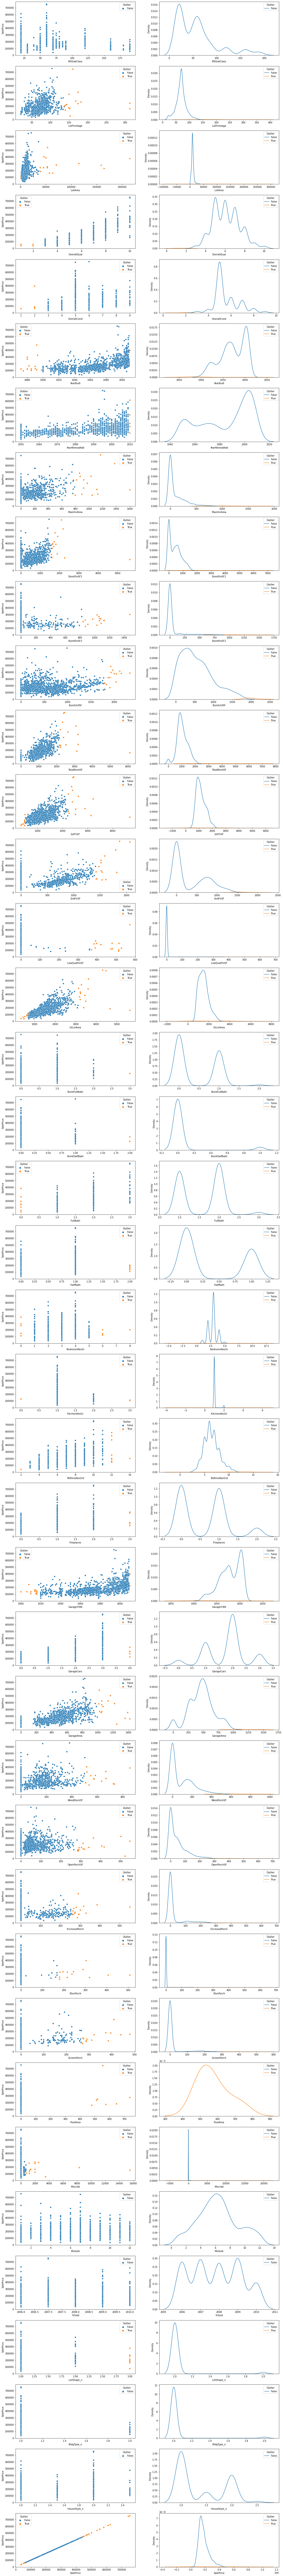

In [173]:
colmns = out_train.select_dtypes(exclude=['O']).columns

plot_vars(out_train, colmns, 'SalePrice')

### Tracer les données catégorielles du train data

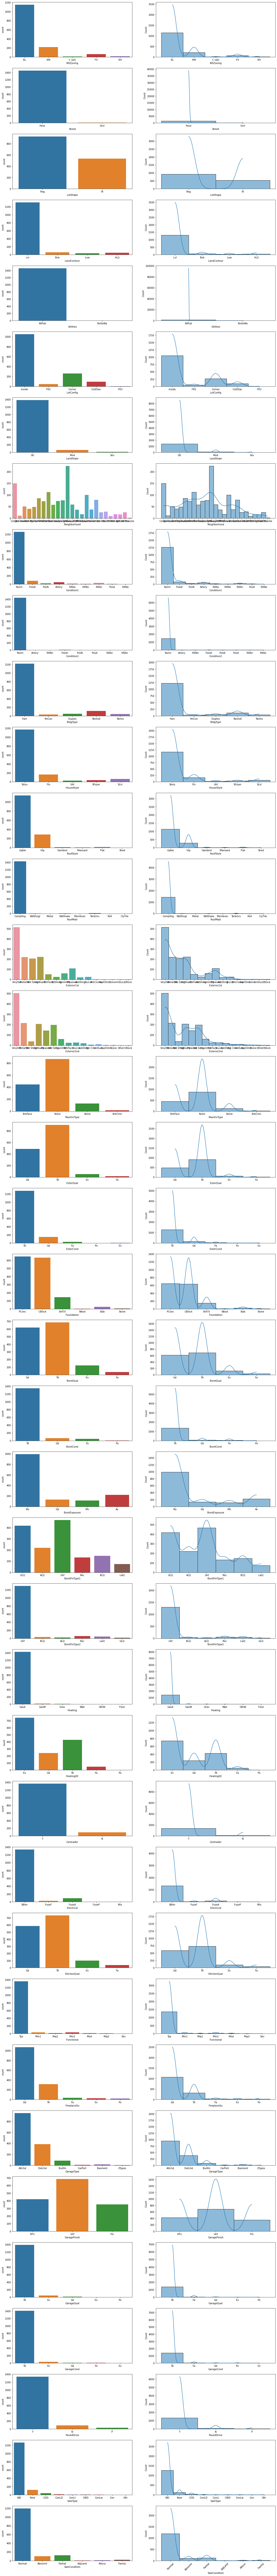

In [174]:
cat_colmns = train_data.select_dtypes(include='O').columns

def cate_plot(data, features):
    fig, axis = plt.subplots(len(features), 2, figsize=(20,200))
    for i, col in enumerate(features):
        sns.countplot(data=data, x=col, ax=axis[i, 0])
        plt.xticks(rotation=45)
        sns.histplot(data=data, x=col, ax=axis[i, 1], kde=True)
        plt.xticks(rotation=45)

cate_plot(out_train[cat_colmns].astype(str), cat_colmns)

Nous avons fait les 4c 

corriger

créer

compléter

convertir

À ce stade, les données sont prêtes pour la partie apprentissage automatique (ML). 








## 5. Fonctionnalités

Dans les modèles ML, nous devons souvent convertir les caractéristiques catégorielles, c'est-à-dire les caractéristiques textuelles, en leur représentation numérique. Pour ce faire, les deux méthodes les plus courantes consistent à utiliser Label Encoder ou OneHot Encoder.


L'encodage d'étiquettes en Python peut être réalisé à l'aide de la bibliothèque Sklearn. 

Sklearn fournit un outil très efficace pour encoder les niveaux des caractéristiques catégorielles en valeurs numériques. LabelEncoder code les étiquettes avec une valeur comprise entre 0 et n_classes-1 où n est le nombre d'étiquettes distinctes. Si une étiquette se répète, elle attribue la même valeur à celle attribuée précédemment.

In [175]:
# label Encoder les caractéristiques catégorielles dans des colonnes numériques
from sklearn.preprocessing import LabelEncoder
lblencoder = LabelEncoder()

Afin de traiter les données pour les algorithmes de prédiction, nous stockons les données prêtes à l'emploi dans autres data frames

In [176]:
trn_data = train_data.copy()
tst_data = test_data.copy()

In [177]:
for col in trn_data.select_dtypes(include=['O']).columns:
    trn_data[col] = lblencoder.fit_transform(trn_data[col].astype(str))
    tst_data[col] = lblencoder.transform(tst_data[col].astype(str))

## Les méthodes de normalisation des données 

sont utilisées pour que les variables, mesurées à différentes échelles, aient des valeurs comparables. Cette étape de prétraitement est importante pour le regroupement et la visualisation des heatmap, l’analyse en composantes principales et d’autres algorithmes d’apprentissage machine basés sur des mesures de distance.

Les approches en matière de normalisation et de standardisation des données:

 - Normalisation standard ou standardisation
 - Normalisation entre 0 et 1 ou normalisation Min-Max
 - Transformation en percentile

### Normalisation Min-Max

Lorsque les variables des données proviennent de distributions éventuellement différentes (et non normales), d’autres transformations peuvent être nécessaires. Une autre possibilité consiste à normaliser les variables pour amener les données sur l’échelle de 0 à 1 en soustrayant le minimum et en divisant par le maximum de toutes les observations.

Cela préserve la forme de la distribution de chaque variable tout en les rendant facilement comparables sur la même “échelle”. Formulation pour normaliser les données entre 0 et 1 :

Transformed.Values=(Values−Minimum)/(Maximum−Minimum)


Formule permettant de redimensionner les données entre un ensemble de valeurs arbitraires [a, b]:


Transformed.Values=a+{[(Values−Minimum)(b−a)]/(Maximum−Minimum)}  où “a,b” sont les valeurs min-max.

In [178]:
targets = trn_data['SalePrice']
trn_data.drop(['SalePrice'], axis=1, inplace=True)
# normaliser et standardiser les données
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mnmx = MinMaxScaler()
stdnorm = StandardScaler()

##############
def standardized_normalized(data):
    df_col = data.columns
    data = mnmx.fit_transform(data)
    data = stdnorm.fit_transform(data)
    return pd.DataFrame(data, columns=df_col)

In [179]:
trn_data.shape

(1460, 78)

In [180]:
trn_data = standardized_normalized(trn_data)
tst_data = standardized_normalized(tst_data)

In [181]:
trn_data.sample(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotShape_n,BldgType_n,HouseStyle_n,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
805,-0.872563,0.951562,0.176107,0.651479,-0.517200,1.216598,1.120936,0.843815,-0.973018,-0.288653,1.923771,0.819898,0.686686,-0.795163,-0.120242,-0.166502,-0.819964,-0.241061,0.789741,-0.761621,0.163779,-0.211454,-0.318683,-0.951226,1.229608e+00,0.311725,0.379073,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.250891,0.138777,-0.180241,-0.147287,-0.819650,-0.045532,0.064238,-1.314904,0.314667,-0.02618,-0.628316,-0.225716,1.455273,-0.036289,-0.03174,-0.295545,0.412455,-0.491516,-0.125797,0.743092,0.751626,2.015543,-0.777976,0.364207,0.835599,-0.324152,0.281048,0.628912,1.203249,0.307315,-0.123046,-0.884658,0.263813,0.302403,-2.819365,0.255978,-0.430030,-0.686776,-0.281887,0.215646,0.186019,0.289745,-0.975151,1.117199
691,0.073375,1.542029,1.104264,2.821425,0.381743,0.752907,0.491040,5.907323,2.218178,-0.288653,0.954822,3.161680,3.315709,3.494687,-0.120242,5.331304,-0.819964,3.948809,2.605522,1.227585,1.390023,-0.211454,2.143103,2.152216,6.459435e-01,1.650307,1.679770,2.296608,0.050424,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.969111,-0.614439,-0.180241,-0.147287,1.326878,-0.045532,0.064238,-1.314904,0.314667,-0.02618,-1.861302,-0.225716,0.457215,-0.036289,-0.03174,-0.295545,0.412455,-0.491516,9.892209,-1.133923,-1.226134,-1.241449,-3.660830,0.364207,0.835599,-2.638394,0.281048,-1.128430,-0.429918,0.307315,-0.123046,-0.884658,0.263813,0.302403,-2.819365,0.255978,-2.652484,-0.686776,-1.514086,0.215646,0.186019,0.289745,0.313867,0.208502
1082,-0.872563,-0.002269,-0.177175,0.651479,-0.517200,1.017873,0.830215,-0.020416,-0.973018,-0.288653,2.018855,0.915667,0.766902,-0.795163,-0.120242,-0.107488,-0.819964,-0.241061,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,9.794663e-01,0.311725,0.252746,0.780197,-0.115656,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,-0.614439,-0.180241,-0.147287,-0.819650,-0.045532,0.064238,0.760512,0.314667,-0.02618,0.604670,-0.225716,-1.206215,-0.036289,-0.03174,-0.295545,0.412455,-0.491516,-0.125797,0.743092,0.751626,-1.241449,-0.777976,0.364207,0.835599,-0.324152,0.281048,0.628912,1.203249,0.307315,-0.123046,-0.884658,0.263813,0.302403,-0.409369,0.255978,-0.430030,-0.686776,-0.281887,0.215646,0.186019,0.289745,0.313867,0.208502
710,-0.636078,-0.638156,-0.640101,-2.241782,0.381743,-1.201217,0.878668,-0.574410,-0.973018,-0.288653,-0.672923,-1.795509,-1.122062,-0.795163,-0.120242,-1.497169,-0.819964,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,-3.054849e-15,-2.365440,-2.212963,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.250891,0.138777,-0.180241,-0.147287,-0.819650,-0.045532,0.064238,-1.314904,0.314667,-0.02618,0.604670,-0.225716,-1.538901,-0.036289,-0.03174,-0.295545,0.412455,-0.491516,-0.125797,0.743092,0.751626,0.387047,-0.777976,0.364207,-0.549162,0.832969,0.281048,0.628912,1.203249,0.307315,-0.123046,0.265476,0.263813,0.302403,0.795629,-4.849587,-0.430030,-0.686776,0.950313,0.215646,0.186019,-3.739087,0.313867,0.208502
415,-0.872563,0.133992,-0.162142,0.651479,-0.517200,1.183477,1.072482,-0.574410,-0.920380,-0.288653,1.695117,0.644322,0.458975,-0.795163,-0.120242,-0

In [182]:
#tests data
tst_data.sample(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotShape_n,BldgType_n,HouseStyle_n,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
388,-0.874711,0.060354,1.174011,-1.447325,-0.497418,-0.571362,-1.404273,-0.570280,-0.965383,-0.297879,-1.268543,-2.363618,0.568967,-0.775254,-0.080483,-0.212291,-0.819544,-0.258484,-1.028720,-0.751040,-1.029543,-0.20391,-0.255371,-0.898055,0.087015,0.301622,0.116326,-0.729632,-0.701628,0.978453,-0.088827,1.642251,-0.057227,-0.092244,1.431498,0.945440,-0.162289,-0.147339,-0.792105,-0.039098,0.06426,-1.333809,0.31870,0.0,-1.319997,-0.207992,-0.953724,-0.056113,0.028691,-0.296617,0.425072,-0.474315,-0.107589,0.742483,0.749057,0.382679,0.673548,0.388852,-0.533007,0.839283,0.290347,0.620425,1.189110,0.324927,-0.078784,1.415522,0.272716,0.298818,0.770002,-1.992302,-0.401521,-0.689701,0.933169,-4.133756,0.186902,0.339114,0.324750,0.201383
192,2.401505,-2.325218,-1.643007,-0.054877,0.400766,0.021140,-0.552131,1.835614,-0.723601,1.366591,-1.087749,-1.272327,-1.692173,0.423416,-0.080483,-1.028113,1.066886,-0.258484,-1.028720,1.237648,-1.029543,-0.20391,-0.918335,-0.898055,-0.224194,-0.988014,-0.851863,-0.729632,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,0.329164,0.945440,-0.162289,-0.147339,1.392547,1.423581,0.06426,0.749732,0.31870,0.0,0.572445,-0.207992,-1.801776,-0.056113,0.028691,1.077237,0.425072,-0.474315,-0.107589,-1.132250,-1.216544,-1.293983,0.673548,0.388852,-0.533007,0.839283,0.290347,0.620425,0.636062,-1.578965,-0.078784,1.415522,0.272716,0.298818,0.770002,0.258390,-0.401521,1.569051,0.933169,0.250409,0.186902,0.339114,0.324750,0.201383
821,1.465443,-2.082041,0.226863,-0.054877,-0.497418,0.844059,0.678742,-0.570280,1.078771,-0.297879,-0.181489,0.810841,0.453397,-0.775254,-0.080483,-0.307058,1.066886,-0.258484,0.773083,-0.751040,-1.029543,-0.20391,-0.918335,0.647066,0.748333,0.301622,0.226976,-0.729632,0.285887,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,1.431498,-0.591492,4.875579,-0.147339,-0.792105,-1.501777,0.06426,-1.333809,0.31870,0.0,-0.689183,-0.207992,-0.105672,-0.056113,0.028691,2.451090,0.425072,-0.474315,-0.107589,-0.507339,-0.654944,0.382679,-0.734340,0.388852,0.833702,-0.265874,0.290347,0.620425,-0.470034,0.324927,-0.078784,-0.876014,0.272716,0.298818,-0.422602,0.258390,1.918553,-0.689701,-1.491575,0.250409,0.186902,0.339114,0.324750,0.201383
1001,-0.172665,-0.817516,-0.722505,-0.751101,1.298950,-1.361364,0.394694,-0.570280,-0.965383,-0.297879,0.942181,-0.181036,-0.358101,0.204612,-0.080483,-0.123704,-0.819544,-0.258484,-1.028720,-0.751040,0.175997,-0.20391,-0.255371,0.647066,-1.858038,-0.988014,-1.119268,0.632925,-0.701628,1.067733,-0.088827,-0.301543,-0.057227,-0.092244,0.329164,-0.591492,-0.162289,-0.147339,0.300221,1.423581,0.06426,0.749732,0.31870,0.0,0.572445,-0.207992,-1.632165,-0.056113,0.028691,-0.296617,-2.590391,-0.474315,-0.107589,1.054939,1.029857,0.382679,0.673548,0.388852,-1.899716,0.839283,0.290347,0.620425,1.189110,0.324927,-0.078784,-0.876014,0.272716,0.298818,0.770002,0.258390,-0.401521,1.569051,0.933169,-4.133756,0.186902,0.339114,0.324750,0.201383
1027,-0.172665,0.057925,-0.577163,0.641347,2.197134,-1.032197,0.678742,-0.570280,-0.398295,-0.297879,-0.302782,-0.827225,-0.900774,0.423416,-0.080483,-0.379164,-0.819544,-0.258484,-1.028720,1.23

Le processus se poursuit avec la  création  d'un modèle de prévision des prix des logements.
